# Prosper Loan Data Exploration
## by (Cynthia Nakaoka)


## Investigation Overview


>  This data exploration was focused on analyzing the indicators that could increase a borrower's chances of getting a loan. Another point in focus was the other side of who lends the money, in this case, check which borrower features are best for predicting the highest rate of return.



## Dataset Overview

> This Prosper's [data set](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub) contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
>The data dictionary that explains the variables in the data set you can find [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Load all formulas and filter to prepare the apresentation
# based on the formula on the Prosper website, the historical/actual rate of return was calculated
df['ActualReturns'] = df.LP_CustomerPayments - df.LoanOriginalAmount - df.LP_ServiceFees - df.LP_CollectionFees + df.LP_NonPrincipalRecoverypayments - df.LP_NetPrincipalLoss
df['ActualReturns'] = 1 + (df.ActualReturns / df.LoanOriginalAmount)

# convert credit grade into ordered categorical types, then plot a histogram of this distribution

credit_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = credit_order)
df['CreditGrade'] = df['CreditGrade'].astype(ordered_var)

# plot a histogram of Employment Status

status = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = status)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ordered_var)

df['IncomeRange'].replace(['Not displayed'], '$0', inplace = True)

# create ordinal categories for income and plot a histogram

ranges = [ 'Not employed', '$0', '$1-24,999', '$25,000-49,999',  '$50,000-74,999', '$75,000-99,999', '$100,000+']          
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ranges)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)


df_ordered = df.sort_values(by='LoanOriginationQuarter')


# create a copy
df['LoanData'] = df['LoanOriginationQuarter']


# split the quarter and create a new column
df['LoanData'] = df['LoanData'].str.split(' ', n=1, expand=True)

# split the year data and create a new column
df['year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year


# concatenate both columns splited before to create a new one with the querter in the end
df['YearQuarter'] = df['year'].astype(str) + df['LoanData']


# order the YearQuarter 
df_order = df.sort_values(by='YearQuarter')


# order the Laon Data column
df_order = df.sort_values(by='LoanData')


nu_vars = ['EstimatedLoss', 'BorrowerAPR']

# Convert ProsperRating into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

# filter Loan status by Completed, Defaulted and Chargedoff
Loan = df.query('LoanStatus=="Completed" or LoanStatus=="Defaulted" or LoanStatus=="Chargedoff" ')


cat_vars = ['ProsperScore', 'IncomeRange','IsBorrowerHomeowner', 'CreditGrade', 'EmploymentStatus', 'IncomeRange']
num_vars = ['BorrowerAPR', 'DebtToIncomeRatio','MonthlyLoanPayment', 'ActualReturns', 'EstimatedLoss', 'CurrentCreditLines', 'EstimatedReturn', 'TotalInquiries','BankcardUtilization','PercentFunded', 'Recommendations' ]

#Filter only completed Loans
filter_loan = df.query('LoanStatus=="Completed"')



## Actual Return distribution

> There are small amounts of total loan loss and a large spike of zero-to-zero situations in relation to financial returns. There are two large returns concentration in the 0% - 50% ranges and one in the 100% to 170% return ranges.


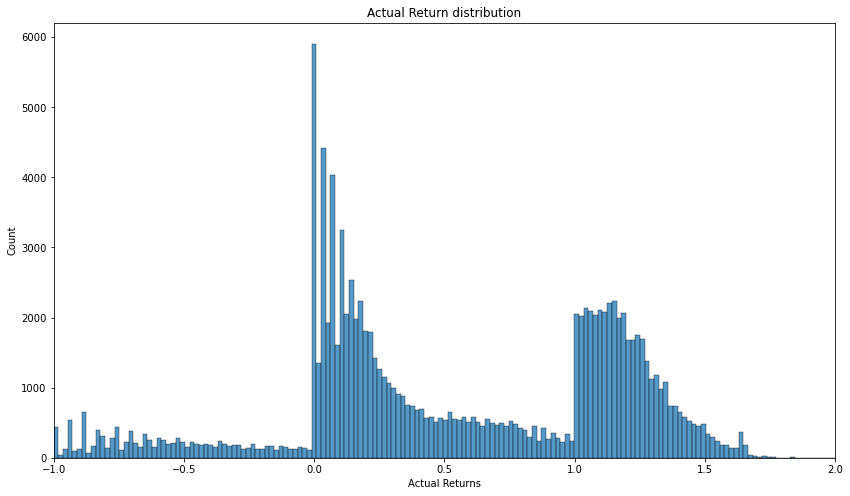

In [4]:
plt.figure(figsize = [14,8])
sns.histplot(df.ActualReturns, bins = 200)
plt.xlabel('Actual Returns')
plt.ylabel('Count')
plt.title('Actual Return distribution')
plt.xlim(-1, 2);

## Actual Return by Income Range and Term

> In the separation of Actual Retruns by Income Range and Term, there is a clear separation of Return by loan time. The time that brought the most current returns was 36 months, then 60 months and the one that brought the least return was 12 months.

> At all times of borrowing, the return starts to decline from the 25,000 range. The most profitable were 0-24,999, Not employed and no income, respectively.

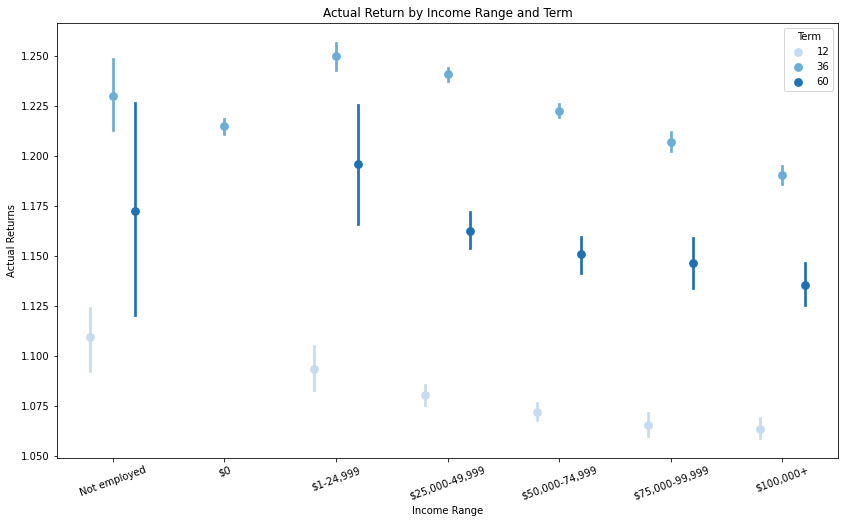

In [5]:
# plot the relationship between Income Range, Actual return and Term
plt.figure(figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'IncomeRange', y = 'ActualReturns', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation = 20)
plt.xlabel('Income Range')
plt.ylabel('Actual Returns')
plt.title('Actual Return by Income Range and Term');

## Actual Return by Prosper Rating and Term

> Having a rating below C is where you got the highest actual return. Ratings B, A and AA returned below 115%, while the lowest returned above 125%.



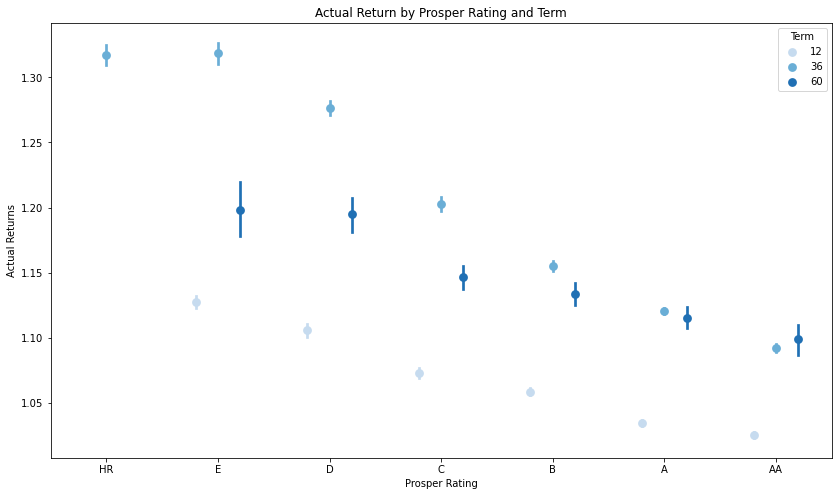

In [6]:
# plot the relationship between Prosper Rating, Actual return and Term
plt.figure(figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'ProsperRating (Alpha)', y = 'ActualReturns', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xlabel('Prosper Rating')
plt.ylabel('Actual Returns')
plt.title('Actual Return by Prosper Rating and Term');

## Estimated Returns by Prosper Score and Income Range

> There is a strong correlation between Estimated Return by income range.Being Not employed, without remuneration or have a salary until 24,999 dollars have average expected return being higher than the other salary ranges. 

> The prosper score is directly correlated with the other two features, with the smallest ranges being more profitable and the best scores much lower, showing an average return of almost half of those with the worst scores.

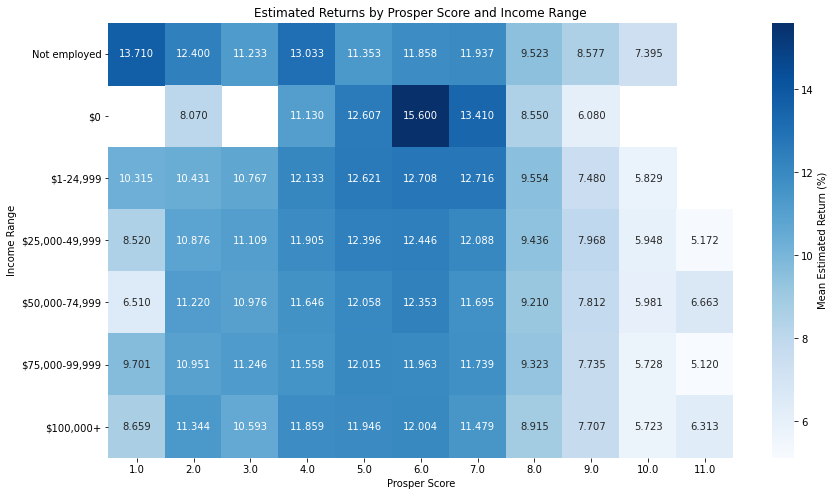

In [7]:
# plot heat map of Mean Estimated Return with completed lean status
plt.figure(figsize = [14,8])

categ_values = filter_loan.groupby(['ProsperScore', 'IncomeRange']).mean()['EstimatedReturn']*100
categ_values = categ_values.reset_index(name = 'EstimatedReturnMean')
categ_values = categ_values.pivot(index = 'IncomeRange', columns = 'ProsperScore', values = 'EstimatedReturnMean')

sns.heatmap(categ_values, annot = True, cmap = "Blues",  fmt = '.3f',
            cbar_kws = {'label' : 'Mean Estimated Return (%)'})
plt.xlabel('Prosper Score')
plt.ylabel('Income Range')
plt.title('Estimated Returns by Prosper Score and Income Range');

## Loan Original Amount by Prosper Rating and term

> There is a strong correlation of approved loans with the original Loan amount, monthly income and term. Prosper Rating appears to have a positive variation from mild to moderate when compared to other features.

> Over the lifespan of 60-month loans there is a significant increase in the original loan amount as ratings improve. This relationship weakens when the Term decreases.

> Most of Loans have Loan Original amount above 4,000 dollars.

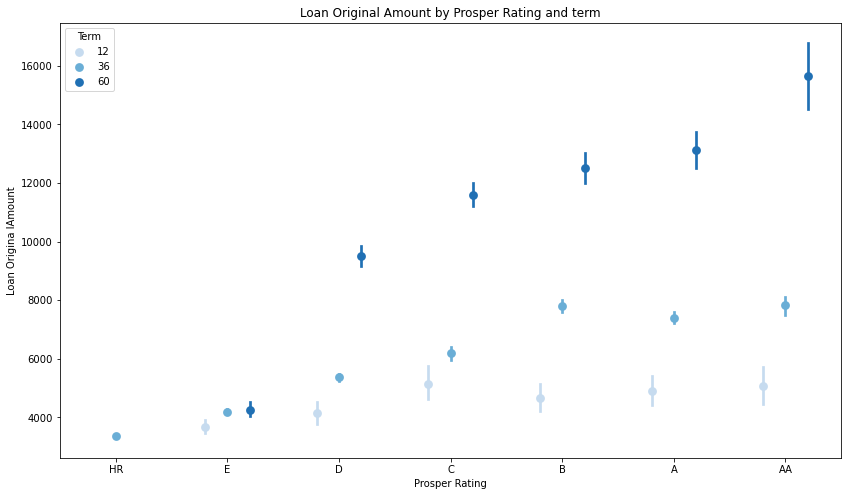

In [8]:
# plot a point plot with only completed loans status and plot the relationsships
fig, ax = plt.subplots( figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax = ax)
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Origina lAmount')
plt.title('Loan Original Amount by Prosper Rating and term');

## Monthly Income by Prosper Rating and Term

> There is a strong correlation of approved loans with monthly income and prosper rating. The higher the monthly income, the higher the rating is.

> In the data analysis it was verified that all Approved Loans had a monthly income above 3,000 dollars


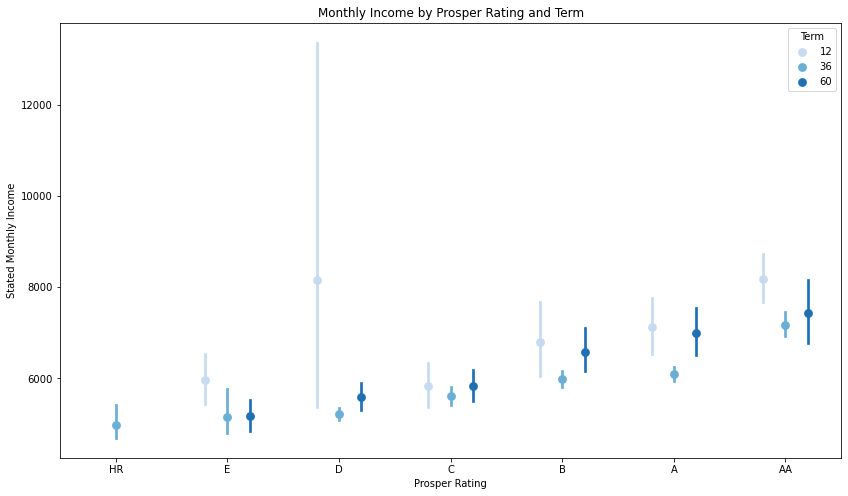

In [9]:
# plot a point plot with only completed loans status and plot the relationsships
fig, ax = plt.subplots(figsize = [14, 8])
sns.pointplot(data = filter_loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax)
plt.xlabel('Prosper Rating')
plt.ylabel('Stated Monthly Income')
plt.title('Monthly Income by Prosper Rating and Term');

## Employment Status by Prosper rating

> The vast majority of approved loan applications are from people who are employed or work full-time.
The distribution of prosper rating who works less than full time is very uniform in all bands. For those who are employed, the classes with the highest volume of loans are in the D, C, B and A ranges. 

>The characteristic of volume of approved loans from those who are not employed is that they are concentrated in ratings considered to be lower and as the rating gets better, the number of approvals decreases.

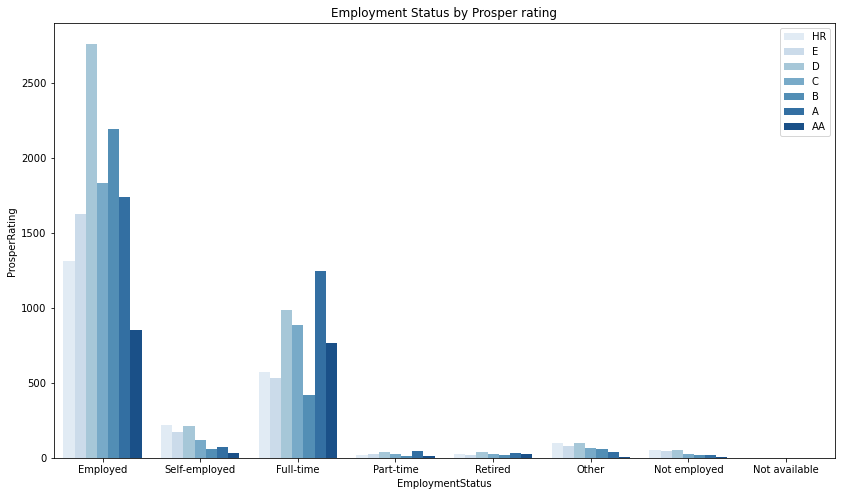

In [10]:
# Prosper rating vs. employment status
plt.figure(figsize = [14, 8])
ax = sns.countplot(data = filter_loan, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(loc = 1, ncol = 1)
plt.xlabel('EmploymentStatus')
plt.ylabel('ProsperRating')
plt.title('Employment Status by Prosper rating');

## Debt To Income Ratio

> The average Debt To Income Ratio is 26% and the graph od this distribution is right skewed. We can notice a growing drop in the number of people who have a ratio greater than 20%.

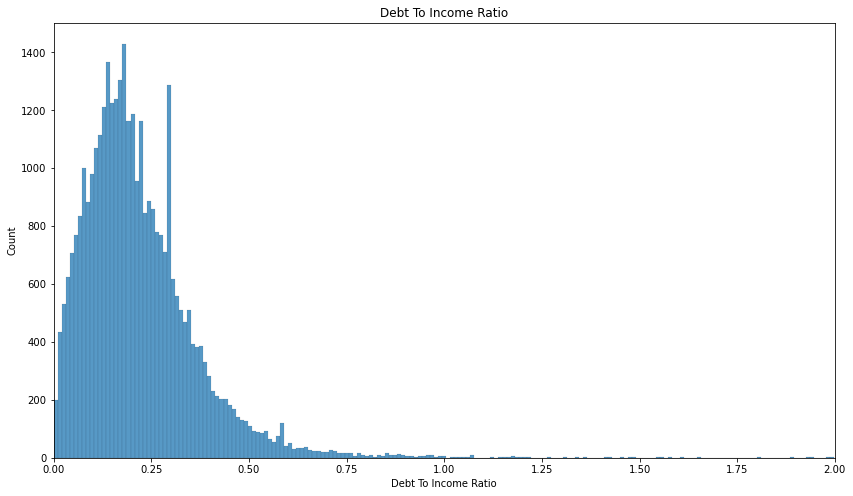

In [11]:
# plot the Debt To Income Ratio

plt.figure(figsize=[14, 8])
sns.histplot(data = filter_loan, x = 'DebtToIncomeRatio');
plt.title('Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.xlim(0, 2);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 809052 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\cynth\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\cynth\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\cynth\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\cynth\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\cynth\anaconda3\lib\site-packages\